## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("../Resources/Mouse_metadata.csv")
study_results = pd.read_csv("../Resources/Study_results.csv")

# Combine the data into a single dataset
merged = mouse_metadata.merge(study_results, how="right", on='Mouse ID')

# Display the data table for preview
merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merged['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = merged.loc[merged.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicated


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = merged.drop_duplicates(subset=None, keep='first', inplace=False)
clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
count_merged = clean['Mouse ID'].count()
count_merged

1892

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
means = merged.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
medians = merged.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
var = merged.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
std = merged.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem = merged.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

# # Assemble the resulting series into a single summary dataframe.
Regimen = pd.DataFrame({"Mean Tumor Vol": means,
                       "Median": medians,
                       "Variance": var,
                       "Std": std,
                       "Standard Error": sem})
Regimen

,Mean Tumor Vol,Median,Variance,Std,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg = merged.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0,0.5,'Data Points')

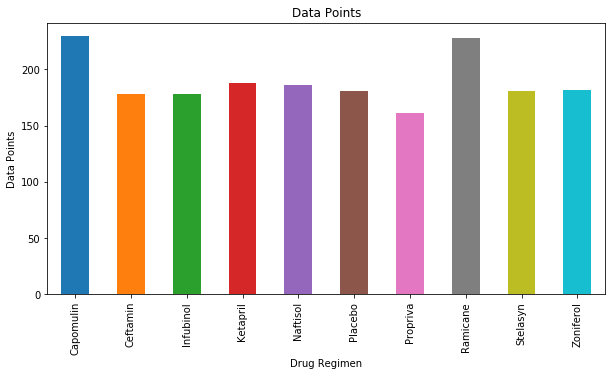

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Generate a bar plot showing number of data points for each treatment regimen using pandas
reg = merged.groupby(["Drug Regimen"]).count()["Mouse ID"]
reg.plot(kind="bar", figsize = (10,5))

plt.title("Data Points")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

Text(0,0.5,'Data Points')

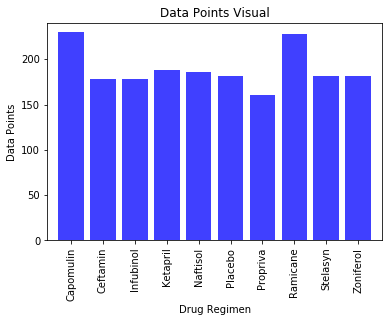

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
u = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(reg))

plt.bar(x_axis, u, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(u)+10)

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")


In [20]:
gen = merged.groupby(["Mouse ID","Sex"])
gen

mouse_gen = pd.DataFrame(gen.size())

#Create the dataframe with total count of Female and Male mice
mouse_gen = pd.DataFrame(mouse_gen.groupby(["Sex"]).count())
mouse_gen.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_gen["Percentage of Sex"] = (100*(mouse_gen["Total Count"]/mouse_gen["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gen["Percentage of Sex"] = mouse_gen["Percentage of Sex"]

#gender_df
mouse_gen


,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


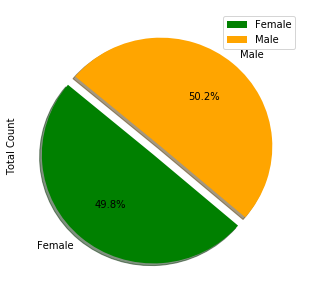

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['green', 'orange']
explode = (0.1, 0)
plot = mouse_gen.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

(-1.1879383453817904,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

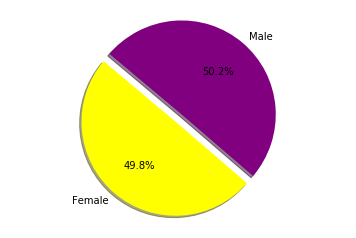

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['yellow', 'purple']

#Determine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimes = merged[merged["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
regimes = regimes.sort_values(["Timepoint"], ascending=True)

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
sort_regimes = regimes.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
sort_regimes


Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
              i557        47.685963
              i738        37.311846
              j119        38.125164
              j246        38.753265
              l509        41.483008
              l897        38.846876
              m601        28.430964
              m957        33.329098
              r157        46.539206
              r554        32.377357
              r944        41.581521
              s185        23.343598
              s710        40.728578
              t565        34.455298
              u364        31.023923
              v923        40.658124
              w150        39.952347
              w914        36.041047
              x401        28.484033
              y793        31.896238
Ceftamin      a275        62.999356
              b447        45.000000
     

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_v_t = merged[merged["Mouse ID"].isin(["j119"])]
tumor_v_t

time_vs_tumer_data = time_vs_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumer_data

line_plot_df = time_vs_tumer_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
